# Age Predictor

In [52]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [53]:
from fastai import *
from fastai.vision import *

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [54]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

In [4]:
# untar data
import tarfile
with tarfile.open('data/wiki_crop.tar') as tar:
    tar.extractall(path='data/face-wiki2')

In [55]:
path = untar_data('face-wiki2'); path

PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2')

In [56]:
path.ls()

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop')]

In [14]:
# move all images into one folder
import shutil
import os

for root, dirs, files in os.walk('data/face-wiki2/wiki_crop'):
    for file in files:
        try:
            shutil.copy(os.path.join(root, file),'data/face-wiki2/wiki_crop/all')
        except:
            continue

In [57]:
path_img = path/'wiki_crop/all'

In [58]:
len(os.listdir('data/face-wiki2/wiki_crop/all'))

60462

In [104]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop/all/44_13664731.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop/all/44_14517597.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop/all/34_3492330.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop/all/35_3847331.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop/all/25_42511619.jpg')]

In [16]:
from datetime import datetime

# rename files with age
data_url="data/face-wiki2/wiki_crop/all/"

for filename in os.listdir("data/face-wiki2/wiki_crop/all"):
    try:
        pl = filename.split("_")
        bgn_date = datetime.strptime(pl[1], '%Y-%m-%d')
        end_date = datetime(year=int(pl[2][:4]), month=7, day=1)
        age = end_date.year - bgn_date.year
        if age >= 10 and age < 120:
            os.rename(data_url+filename, data_url+str(age)+"_" + pl[0] +'.jpg')
        else:
            os.remove(data_url+filename)
    except:
        os.remove(data_url+filename)

In [60]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [61]:
pat = re.compile(pat)
def get_float_labels(fn): return int(pat.search(str(fn)).group(1))

In [62]:
data = (ImageItemList.from_folder(path_img)
        .random_split_by_pct()
        .label_from_func(get_float_labels, label_cls=FloatList)
        .transform(get_transforms(), size=224)
        .databunch())                          
data.normalize(imagenet_stats)    

ImageDataBunch;
Train: LabelList
y: FloatList (48369 items)
[FloatItem 44.0, FloatItem 35.0, FloatItem 25.0, FloatItem 27.0, FloatItem 39.0]...
Path: .
x: ImageItemList (48369 items)
[Image (3, 298, 298), Image (3, 192, 192), Image (3, 1, 1), Image (3, 301, 301), Image (3, 420, 500)]...
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop/all;
Valid: LabelList
y: FloatList (12092 items)
[FloatItem 39.0, FloatItem 23.0, FloatItem 29.0, FloatItem 67.0, FloatItem 18.0]...
Path: .
x: ImageItemList (12092 items)
[Image (3, 363, 500), Image (3, 52, 52), Image (3, 1, 1), Image (3, 426, 426), Image (3, 312, 501)]...
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop/all;
Test: None

In [17]:
len(os.listdir("data/main/wiki/all"))

60232

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


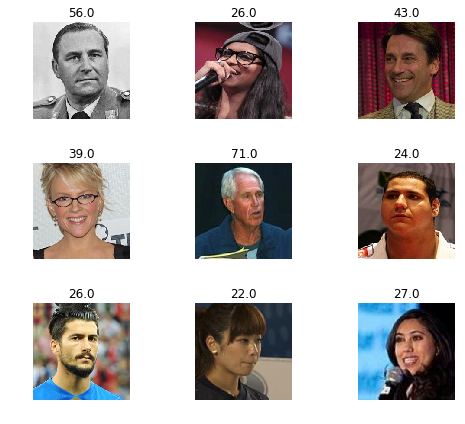

In [13]:
data.show_batch(rows=3, figsize=(7,6))

## Training: resnet34

In [15]:
learn = create_cnn(data, models.resnet34)

In [21]:
learn.fit_one_cycle(4)

Total time: 24:15
epoch  train_loss  valid_loss
1      174.652069  161.003769  (06:07)
2      160.693237  141.216812  (06:02)
3      143.642960  136.331558  (06:02)
4      138.859207  135.869980  (06:02)



In [26]:
learn.save('age-stage-1')

## Results

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


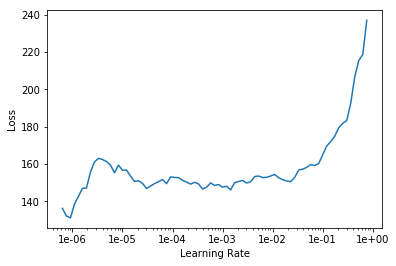

In [24]:
learn.recorder.plot()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

Total time: 17:14
epoch  train_loss  valid_loss
1      154.850433  144.796173  (08:37)
2      125.523285  125.176064  (08:36)



## Training: resnet50

In [201]:
data = (ImageItemList.from_folder(path_img)
        .random_split_by_pct()
        .label_from_func(get_float_labels, label_cls=FloatList)
        .transform(get_transforms(), size=224)
        .databunch())                          
data.normalize(imagenet_stats)    

ImageDataBunch;
Train: LabelList
y: FloatList (48369 items)
[FloatItem 44.0, FloatItem 44.0, FloatItem 34.0, FloatItem 35.0, FloatItem 25.0]...
Path: .
x: ImageItemList (48369 items)
[Image (3, 457, 456), Image (3, 298, 298), Image (3, 400, 500), Image (3, 192, 192), Image (3, 1, 1)]...
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop/all;
Valid: LabelList
y: FloatList (12092 items)
[FloatItem 39.0, FloatItem 45.0, FloatItem 24.0, FloatItem 41.0, FloatItem 34.0]...
Path: .
x: ImageItemList (12092 items)
[Image (3, 302, 302), Image (3, 249, 249), Image (3, 264, 500), Image (3, 150, 150), Image (3, 228, 228)]...
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2/wiki_crop/all;
Test: None

In [64]:
learn = create_cnn(data, models.resnet50)

In [65]:
learn.fit_one_cycle(8)

Total time: 1:42:55
epoch  train_loss  valid_loss
1      163.428665  145.793732  (13:07)
2      151.969147  135.730240  (12:49)
3      138.605347  132.319473  (12:49)
4      139.021851  131.641296  (12:49)
5      135.834290  123.648262  (12:49)
6      132.694229  123.946655  (12:49)
7      127.565926  122.011581  (12:50)
8      119.801346  121.615120  (12:49)



In [66]:
learn.save('age-stage-1-50')

In [100]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-3))

Total time: 50:56
epoch  train_loss  valid_loss
1      147.177490  139.448914  (17:02)
2      129.303528  125.776764  (16:56)
3      119.536751  117.241501  (16:57)



In [140]:
learn.save('age-stage-2-50')

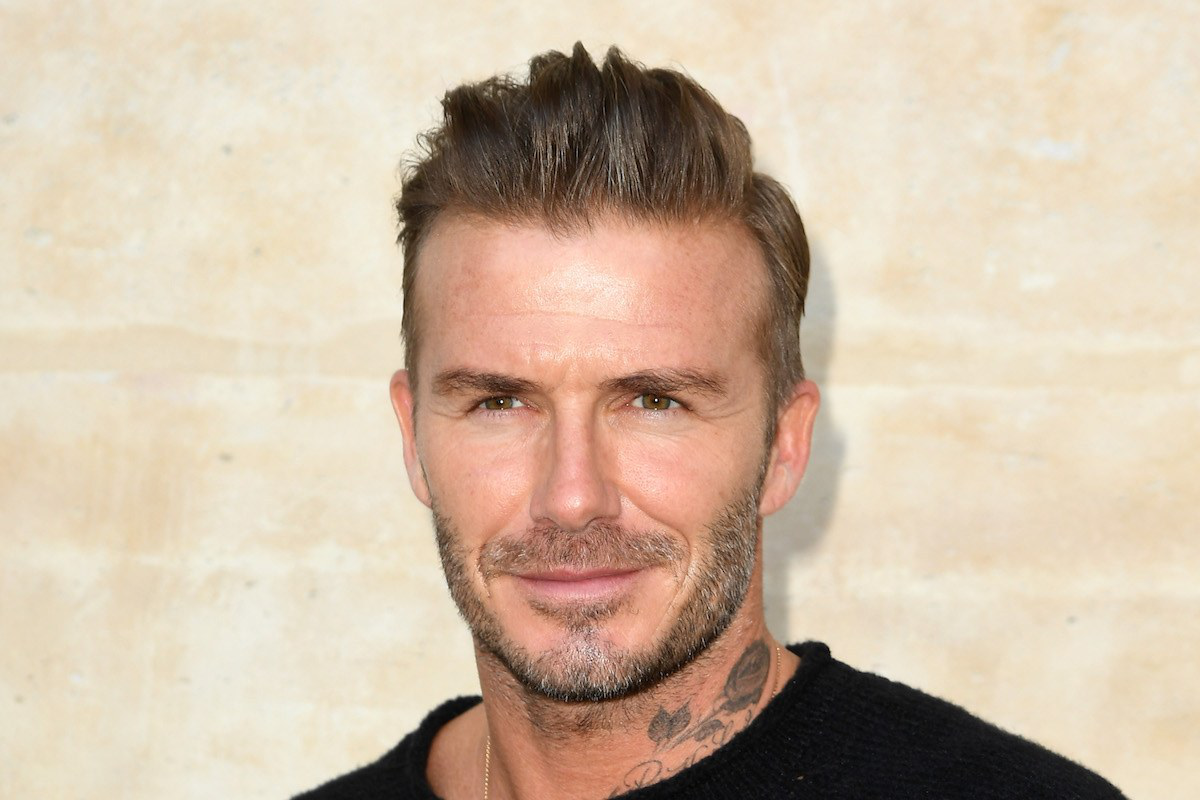

In [208]:
img = open_image('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/david1.jpg')
img

In [137]:
int(round(float(learn.predict(img)[0][0]),0))

40

# Inference Code For App

In [264]:
data_bunch = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_const(0, label_cls=FloatList)
        .transform(get_transforms(), size=224)
        .databunch()).normalize(imagenet_stats);
data_bunch

ImageDataBunch;
Train: LabelList
y: FloatList (98232 items)
[FloatItem 0.0, FloatItem 0.0, FloatItem 0.0, FloatItem 0.0, FloatItem 0.0]...
Path: .
x: ImageItemList (98232 items)
[Image (3, 194, 193), Image (3, 92, 91), Image (3, 379, 500), Image (3, 149, 149), Image (3, 76, 77)]...
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2;
Valid: LabelList
y: FloatList (24557 items)
[FloatItem 0.0, FloatItem 0.0, FloatItem 0.0, FloatItem 0.0, FloatItem 0.0]...
Path: .
x: ImageItemList (24557 items)
[Image (3, 375, 500), Image (3, 489, 489), Image (3, 1, 1), Image (3, 163, 163), Image (3, 228, 228)]...
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2;
Test: None

In [252]:
learn2 = create_cnn(data_bunch, models.resnet50, pretrained=False)

In [243]:
learn2.load('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/age-stage-2-50')

Learner(data=ImageDataBunch;
Train: LabelList
y: FloatList (98232 items)
[FloatItem 0.0, FloatItem 0.0, FloatItem 0.0, FloatItem 0.0, FloatItem 0.0]...
Path: .
x: ImageItemList (98232 items)
[Image (3, 92, 91), Image (3, 489, 489), Image (3, 149, 149), Image (3, 500, 500), Image (3, 76, 77)]...
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2;
Valid: LabelList
y: FloatList (24557 items)
[FloatItem 0.0, FloatItem 0.0, FloatItem 0.0, FloatItem 0.0, FloatItem 0.0]...
Path: .
x: ImageItemList (24557 items)
[Image (3, 239, 239), Image (3, 244, 244), Image (3, 121, 122), Image (3, 500, 500), Image (3, 137, 136)]...
Path: /home/nbuser/courses/fast-ai/course-v3/nbs/dl1/data/face-wiki2;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, pa

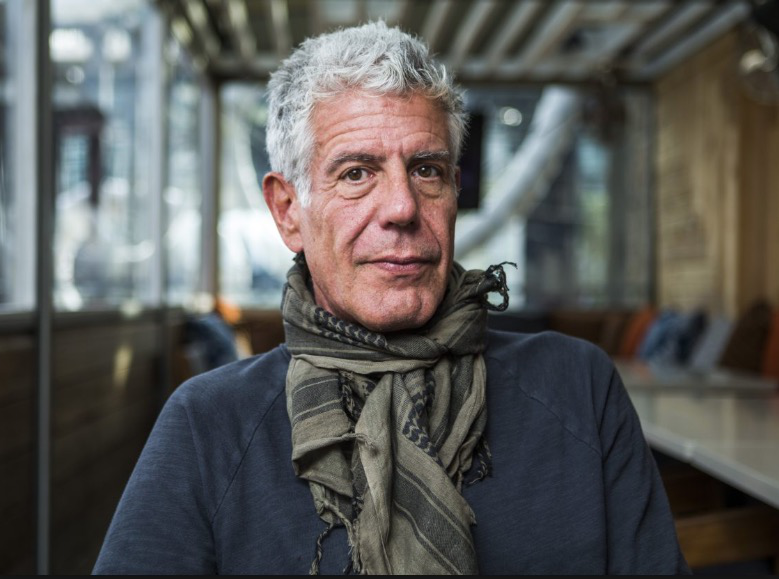

In [210]:
img = open_image('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/tony2.jpg')
img

In [211]:
int(round(float(learn2.predict(img)[0][0]),0))

64